Online Twitter Basics
======================



Note 1: I run the IPython notebook in pylab=inline mode which makes it look like Matlab; this may mean that you will have to explicitly `import` some modules that I take for granted. Alternatively, you could configure yourself for pylab, which I obviously think is better.  

Note 2: Twitter very popular outside the United States. Many non-English languages have codesets that I don't handle properly leading to program failures. Keep calm and carry on: at worst, you'll have to restart the kernel.

### Logon to Twitter

I have my Twitter credentials in a file `twitter_credential.py` ... you need to create your own as follows: 
```python
def twitter_credentials():
    """
    Generate your own Twitter credentials here:  https://apps.twitter.com/
    """
    api_key = "ANab471uwUqwasdwtRhasd2t9yay"
    api_secret = "HQbiOCpVIAtD3lgzasfasfAiRCeyYGn10gzhYoO9h3fwQM"
    
    access_token_key = "509013104-vEz1ndfdfgdrfZ5UNCslkHpUAtjVgEo1i3vY4"
    access_token_secret = "Nv90QGlcQw3DdrfgerdgKhC0zwS3hKE7IKgoW2F2Q"
    
    return (api_key, api_secret, access_token_key, access_token_secret)
```

If you get a message similar to `<twitter.api.Twitter object at 0x000000000E79AAC8>`, you've succesfully signed on

In [1]:
from twitter_credentials import twitter_credentials # my credentials
token, token_secret, consumer_key, consumer_secret = twitter_credentials()

import oauth2 as oauth

import twitter

auth = twitter.oauth.OAuth(consumer_key, consumer_secret, token, token_secret)

twitter_api = twitter.Twitter(auth=auth)
print (twitter_api)

###QT Console  
I like to run the qtconsole whenever I am using a notebook because it allows me to experiment on a command-line interface to the notebook's session, with all its current variables, etc.

In [2]:
%qtconsole

###`twitter_functions.py`  
I have a file `twitter_functions.py` that contains a number of utility functions. Find it on my GitHub repo: [grfiv/healthcare_twitter_analysis](https://github.com/grfiv/healthcare_twitter_analysis)  

You also need to have the `AFINN-111.txt` sentiment-word file installed. 

A note on `AFINN-111.txt`: the file has a tab delimiter separating words and phrases and their score. You can add your own n-grams as long as you retain the formatting. I strip out extra white space in phrases so you don't have to be exact in that regard. The sentiment score is simply the sum of the scores of any n-grams found in the text after urls, hashtags and users have been removed.

### Make a simple query

Modify the word or phrase in `q = " ... "`. Only one term.  
Try changing `num_tweet_request`, too.

In [3]:
import json
from twitter_functions import twitter_search

num_tweet_request = 100

q = "zika"
initial_results = twitter_search(twitter_api, q, max_results = num_tweet_request)

### Filter by `retweet_count`

The idea is that the the best tweets are ones that have been retweeted. So we will keep only those tweets that have a `retweet_count` greater than some threshold.

`favorite_count` is also supposed to have some bearing on importance but it's usually zero in the ones I've looked at. 

In [4]:
retweet_threshold = 4

results = [tweet 
           for tweet in initial_results 
           if tweet['retweet_count'] > retweet_threshold]

num_tweets = len(results)
print ("%d tweets received"%len(initial_results))
print ("%d tweets after retweet filtering"%len(results))

200 tweets received
34 tweets after retweet filtering


### Display the raw json returned for one of the `num_tweets` results we asked for

In [5]:
# I commented this out because the list is very long
# However, to do any serious Twitter munging, you need to know all about this thing

#print json.dumps(results[1], indent=4)

###Parse the 'text' field, which is the body of the tweet, for each of the `num_tweets` responses returned
I use my utility function `parse_tweet_text` for the body of the tweet itself; it also returns the AFINN sentiment, for which you must have `AFINN-111.txt` installed. I parse the json directly for the other fields.

A response of `[]` means nothing was returned for a particular 'entity'.

In [6]:
from twitter_functions import parse_tweet_text 

senders = []
for i in range(num_tweets):
    senders.append(results[i]['user']['name'])
    
    tweet_text = results[i]['text']
    words, hashes, users, urls, AFINN_score = parse_tweet_text(tweet_text, AFINN=True)

    print ("the actual text of results[%d]['text']\nretweet_count  = %d\nfavorite_count = %d\n...................\n%s"%(i,results[i]['retweet_count'],results[i]['favorite_count'],tweet_text))
    print ("\nthe list of words %s"%[word.encode('utf-8') for word in words])
    print ("hashtags referenced %s"%[hash_.encode('utf-8') for hash_ in hashes])
    print ("twitter users mentioned %s"%[user.encode('utf-8') for user in users])
    print ("URLs %s"%[url.encode('utf-8') for url in urls])
    print ("AFINN sentiment score %d"%AFINN_score)
    print ("............................")
    print ("description: %s"%results[i]['user']['description'])
    print ("followers_count: %d"%results[i]['user']['followers_count'])
    print ("friends_count: %d"%results[i]['user']['friends_count'])
    print ("favourites_count: %d"%results[i]['user']['favourites_count'])
    print ("location: %s"%results[i]['user']['location'])
    print ("time_zone: %s"%results[i]['user']['time_zone'])
    print ("screen_name: %s"%results[i]['user']['screen_name'])
    print ("name: %s"%results[i]['user']['name'])
    if results[i]['place'] is not None: print ("place: %s"%results[i]['place'])
    print ("====================================================================================\n")

the actual text of results[0]['text']
retweet_count  = 11
favorite_count = 0
...................
RT @LSHTM: “Any act of transmission is a concern, especially in urbanized centers with a large population” Elizabeth Brickley speaks to @wa…

the list of words [b'rt', b'\xe2\x80\x9cany', b'act', b'of', b'transmission', b'is', b'a', b'concern,', b'especially', b'in', b'urbanized', b'centers', b'with', b'a', b'large', b'population\xe2\x80\x9d', b'elizabeth', b'brickley', b'speaks', b'to', b'\xe2\x80\xa6']
hashtags referenced []
twitter users mentioned [b'lshtm', b'wa']
URLs []
AFINN sentiment score 0
............................
description: Writer. Chief areas of interest: healthcare, animal welfare, prison reform, education, economic equity, expanded franchise, environment, art. History buff
followers_count: 2981
friends_count: 2969
favourites_count: 11772
location: 
time_zone: None
screen_name: A_G_Moore
name: A_G_Moore

the actual text of results[1]['text']
retweet_count  = 31
favorite_c

the actual text of results[19]['text']
retweet_count  = 598
favorite_count = 0
...................
RT @ISPM_ZOAP: @ISPM_ZOAP Therapeutic treatment of Zika virus infection using a brain-penetrating antiviral peptide. https://t.co/joq9qkiAsq

the list of words [b'rt', b'therapeutic', b'treatment', b'of', b'zika', b'virus', b'infection', b'using', b'a', b'brain-penetrating', b'antiviral', b'peptide.']
hashtags referenced []
twitter users mentioned [b'ispm_zoap', b'ispm_zoap']
URLs [b'https://t.co/joq9qkiasq']
AFINN sentiment score 0
............................
description: 
followers_count: 0
friends_count: 0
favourites_count: 0
location: 
time_zone: None
screen_name: hmHDMnqR0iC0LL8
name: المولى الملحم،

the actual text of results[20]['text']
retweet_count  = 598
favorite_count = 0
...................
RT @ISPM_ZOAP: @ISPM_ZOAP Therapeutic treatment of Zika virus infection using a brain-penetrating antiviral peptide. https://t.co/joq9qkiAsq

the list of words [b'rt', b'therapeutic', b'tr

# Let's do a quick lexical analysis of these tweets

####Step 1: Collect all the tweets in one string

Note: the AFINN score will be for the entire string, which may or may not be helpful

In [7]:
tweets = ""
for i in range(num_tweets):
    tweets = tweets + " " + results[i]['text']

words, hashes, users, urls, 
AFINN_score = parse_tweet_text(tweets, AFINN=True)

print ("AFINN sentiment score %d"%AFINN_score)

AFINN sentiment score 23


####Step 2: Remove the stop words 

Note: English stop words won't help in Espanish

In [8]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop.append("it's")
stop.append('w/')

filtered_word_list = [word for word in words if word not in stop]
filtered_word_set  = set(filtered_word_list)

print ("%d  total words"%len(filtered_word_list))
print ("%d unique words"%len(filtered_word_set))

465  total words
159 unique words


####Step 3: Show the top 10 of each entity type

Note: 'rt' means retweet and it's very common, but you may not consider it a word

In [9]:
from collections import Counter
from prettytable import PrettyTable

for label, data in (('Word', filtered_word_list), 
                    ('Senders', senders), 
                    ('Users Mentioned', users),
                    ('Hashtag', hashes),
                    ('URL', urls)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' 
    print (pt)

+-------------------+-------+
| Word              | Count |
+-------------------+-------+
| rt                |    34 |
| que               |    18 |
| zika              |    16 |
| de                |    15 |
| using             |    15 |
| therapeutic       |    12 |
| treatment         |    12 |
| virus             |    12 |
| infection         |    12 |
| brain-penetrating |    12 |
+-------------------+-------+
+----------------------+-------+
| Senders              | Count |
+----------------------+-------+
| zika69               |     2 |
| David Navarro        |     2 |
| A_G_Moore            |     1 |
| Cinthia              |     1 |
| susan Elizabeth Vaca |     1 |
| Yuri Pérez Carranza  |     1 |
| Enrique Méndez       |     1 |
| yuk                  |     1 |
| melva vanegas        |     1 |
| rosia                |     1 |
+----------------------+-------+
+-----------------+-------+
| Users Mentioned | Count |
+-----------------+-------+
| ispm_zoap       |    24 |
| salu

####Step 4: Lexical Diversity

In [10]:
from twitter_functions import lexical_diversity, average_words

print ("Lexical Diversity")
print ("words  %0.2f"%lexical_diversity(set(words), words)) # words not filtered_word_list
print ("hashes %0.2f"%lexical_diversity(set(hashes), hashes))
print ("users  %0.2f"%lexical_diversity(set(users), users))
print ("urls   %0.2f"%lexical_diversity(set(urls), urls))

print ("\nAverage per tweet")
print ("words           %0.2f"%average_words(words, num_tweets))
print ("filtered words  %0.2f"%average_words(filtered_word_list, num_tweets))
print ("hashes          %0.2f"%average_words(hashes, num_tweets))
print ("users           %0.2f"%average_words(users, num_tweets))
print ("urls            %0.2f"%average_words(urls, num_tweets))

Lexical Diversity
words  0.32
hashes 0.55
users  0.31
urls   0.15

Average per tweet
words           16.24
filtered words  13.68
hashes          0.32
users           1.62
urls            0.38


####Step 5: Can't finish without a word cloud, right?  

Note 1: foreign-language codes often cause this to fail.  

Note 2: the lexical density determines the look of the result: a few words in a mass of many infrequent words makes for a more attractive picture. Playing with the numerical parameter to num_tags also has an effect.

['rt', '“any', 'act', 'transmission', 'concern,', 'especially', 'urbanized', 'centers', 'large', 'population”', 'elizabeth', 'brickley', 'speaks', '…', 'rt', '¡lava', 'bien', 'los', 'recipientes', 'que', 'contengan', 'agua!', 'evita', 'que', 'aparezcan', 'mosquitos', 'que', 'pueden', 'contagiarte', 'de', 'zika,', 'dengue', 'chikun…', 'rt', 'paciência', 'é', 'tudo.', 'tudo', 'que', 'eu', 'não', 'tenho.', '��', 'rt', '¡lava', 'bien', 'los', 'recipientes', 'que', 'contengan', 'agua!', 'evita', 'que', 'aparezcan', 'mosquitos', 'que', 'pueden', 'contagiarte', 'de', 'zika,', 'dengue', 'chikun…', 'rt', '¡lava', 'bien', 'los', 'recipientes', 'que', 'contengan', 'agua!', 'evita', 'que', 'aparezcan', 'mosquitos', 'que', 'pueden', 'contagiarte', 'de', 'zika,', 'dengue', 'chikun…', 'rt', 'el', 'riesgo', 'de', 'transmisión', 'de', 'enfermedades', 'como', 'el', 'entre', 'otros,', 'reside', 'primariamente', 'en', 'la', 'pres…', 'rt', 'nunca', 'crie', 'expectativas', 'demais.', '��', 'rt', 'therapeuti

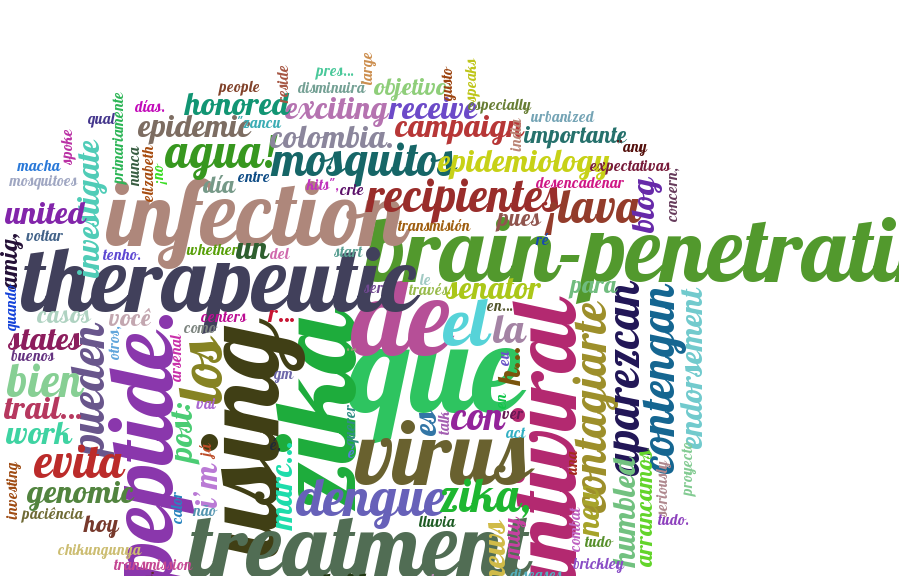

In [14]:
from pytagcloud import create_tag_image, make_tags
import IPython.display

# 'rt' is very common and useless
filter_ex_rt = list(filtered_word_list)
while 'rt' in filter_ex_rt: filter_ex_rt.remove('rt')

for item in [filter_ex_rt]:
    c = Counter(item)

num_tags = min(150, len(c.most_common())-1)
tags     = make_tags(c.most_common()[:num_tags], maxsize=120)
print (filtered_word_list)
create_tag_image(tags, 'wordcloud.png', size=(900,900), fontname='Lobster' )

IPython.display.display(IPython.display.Image(filename='wordcloud.png'))